  ### 1D Random Walk

  Random walks are commonly used to model biological dynamics at the population, cellecular, and molecular level (Berg, 1993). Often it is possible to sufficiently model the dynamics of a biological process using a single dimension. Here, you will simulate the dynamocs of a 1D random walk (i.e., coin-flipping) and calculate quantities that capture essential features of random walks.  

  At each step a random variable $s_{t}$ is independantly and identically drawn as follows

  $s_{t} =
  \begin{cases}
  & +1 \text{ with probability} \, p  \\
  & -1 \text{ with probability} \, 1-p
  \end{cases}$


  The sequence of $s_{t}$ over T steps constitutes a single random walk: $s_{1}, s_{2},.., s_{T}$

  By taking the sum of the sequence of the sequence we can calculate the net distance of the walk $S(T) = \sum_{t=1}^{T}s(t)$, the expectation of which should be zero if the walk is unbiases ($p=0.5$). Below are the objectives of the assignment

  1) Generate a large number of random walks with $p=0.5$ and $T=1,000$ steps and calculate $S(T)$ for each walk. Plot the distribution of $S(T)$. Using the definition of $s_{t}$, propose a probability distribution for the empirical distribution. Why is this a reasonable distribution?


2) Compute the arcsine law for the last visit

Arcsine laws are a collection of patterns that hold for 1D random walks. Here you will you calculate the second arcinse law, which concerns the last time that a 1D random walk reached the origin ($T_{0}$). The quantity $T_{0}$ follows the cumulative distribution

$P(T_{0} \leq x) = \frac{2}{\pi} \text{arcsin}(\sqrt(x))$

Simulate a large nmber of random walks with $p=0.5$ and $T=1,000$ steps and calculate $T_{0}$ for each one. Plot the distribution of $T_{0}$. Does it follow the arcsine law? Why should the distribution of $T_{0}$ have this pattern?


3) Compute the arcsine law for the position of the maximum

The third arcise law concerns the time at which $S(t)$ is at its maximum value $T_{\text{max}}$. Again, the distribution should follow an arcsine law.

$P(T_{\text{max}} \leq x) = \frac{2}{\pi} \text{arcsin}(\sqrt(x))$

Run a simulation to demonstrate the case. Show that this result is robust to biased random walks (i.e., $p \neq 0.5$). Why do you think that the arcsine law is capable of capturing multiple patterns?


Like all of these projects, we ask that you think of and perform additional analyses that you find interesting, time permitting. Relevant supplemental material for this exercise can be found in the first chapter of Feller (2008).


### References

Berg, H. C. (1993). Random walks in biology. In Random Walks in Biology. Princeton University Press.

Feller, W. (2008). An introduction to probability theory and its applications, vol 1. John Wiley & Sons.



***1. Random experiment***

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

[[ 0.  1.  1. ... -1. -1. -1.]
 [ 0.  1. -1. ...  1.  1. -1.]
 [ 0. -1. -1. ...  1. -1.  1.]
 ...
 [ 0. -1. -1. ...  1. -1. -1.]
 [ 0.  1.  1. ...  1.  1.  1.]
 [ 0.  1. -1. ... -1. -1.  1.]]
[-8. 12.  6. ... -2.  4. 14.]


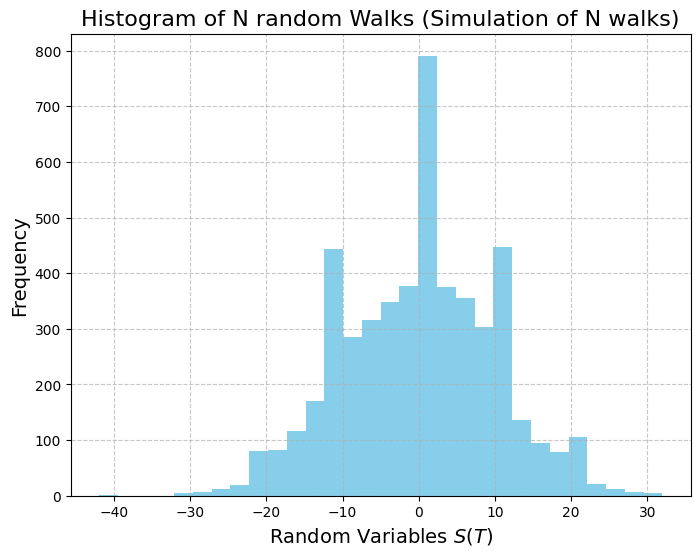

In [ ]:
def random_walk(P, T):
    St = np.zeros(T+1)  # T+1 para incluir s0
    for t in range(1, T+1):  # Empezamos en 1 para s0 = 0
        p = np.random.rand()  # Generamos un número aleatorio
        if P >= p:
            St[t] = + 1
        else:
            St[t] = - 1
    return St

# Parámetros
P = 0.5
T = 100
N = 5000

# N caminatas, cada una con T+1 valores
S = np.zeros((N, T+1))
S_sum = np.zeros(N)

for i in range(N):
    S[i] = random_walk(P, T)
    S_sum[i] = np.sum(S[i])
print(S)
print(S_sum)
plt.figure(figsize=(8, 6))
plt.hist(S_sum, bins= 30, color='skyblue')
plt.xlabel('Random Variables $S(T)$', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of N random Walks (Simulation of N walks)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


***Deducing a probability for P(S(t))***




S_variable: [-100  -98  -96  -94  -92  -90  -88  -86  -84  -82  -80  -78  -76  -74
  -72  -70  -68  -66  -64  -62  -60  -58  -56  -54  -52  -50  -48  -46
  -44  -42  -40  -38  -36  -34  -32  -30  -28  -26  -24  -22  -20  -18
  -16  -14  -12  -10   -8   -6   -4   -2    0    2    4    6    8   10
   12   14   16   18   20   22   24   26   28   30   32   34   36   38
   40   42   44   46   48   50   52   54   56   58   60   62   64   66
   68   70   72   74   76   78   80   82   84   86   88   90   92   94
   96   98  100]


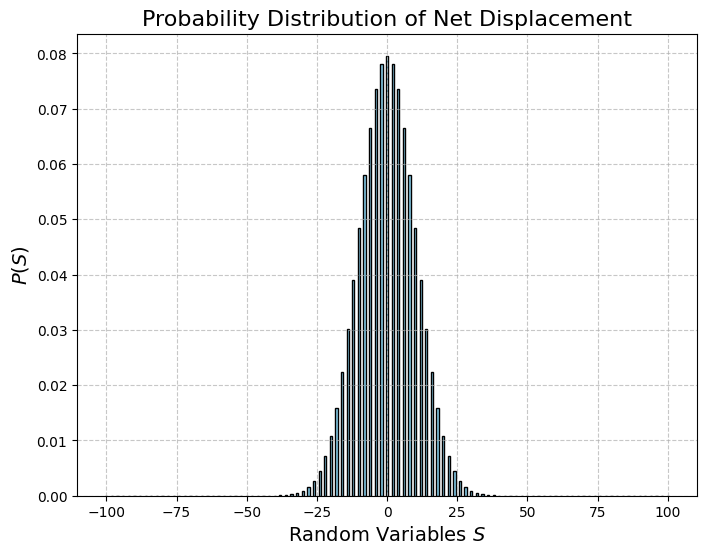

In [ ]:
# Ensuring that (T + S) is even
S_variable = np.arange(-T, T+1, 2)
print("S_variable:", S_variable)

def coefficient(T, S):
    return math.factorial(T) // (math.factorial((T - S)//2) * math.factorial((T + S)//2))


P_dist = np.zeros(len(S_variable))

for i, S in enumerate(S_variable):
    P_dist[i] = coefficient(T, S) * (0.5**T)
plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.bar(S_variable, P_dist, color='skyblue', edgecolor='black')
plt.xlabel('Random Variables $S$', fontsize=14)
plt.ylabel('$P(S)$', fontsize=14)
plt.title('Probability Distribution of Net Displacement', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


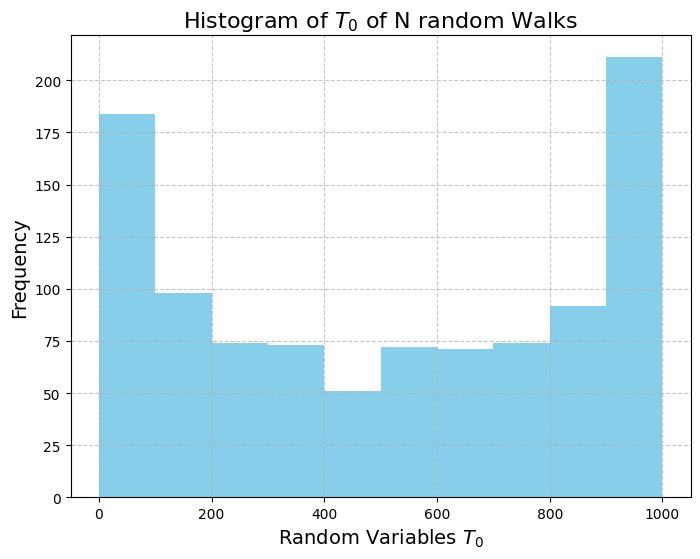

In [ ]:
def random_walk(P, T):
    St = np.zeros(T+1)  # T+1 to include s0
    for t in range(1, T+1):
        p = np.random.rand()
        if P >= p:
            St[t] = St[t-1] + 1
        else:
            St[t] = St[t-1] - 1
    return St

# Parámetros
P = 0.5
T = 1000
N = 1000

# N caminatas, cada una con T+1 valores
S = np.zeros((N, T+1))
S_sum = np.zeros(N)

for i in range(N):
      S[i] = random_walk(P, T)

zero = []

for s in S:
  #print(s)
  zero.append([i for i,x in enumerate(s) if x == 0][-1]) #this is to find a position in a list.
#print(zero)

plt.figure(figsize=(8, 6))
plt.hist(zero, bins=10, color='skyblue')
plt.xlabel('Random Variables $T_0$', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of $T_0$ of N random Walks ', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Lets do the cumulative of our variables.


[6, 8, 0, 898, 88, 0, 932, 564, 536, 992, 206, 672, 994, 762, 172, 360, 2, 834, 46, 194, 1000, 164, 108, 346, 1000, 830, 932, 274, 40, 878, 834, 922, 992, 442, 206, 996, 960, 340, 230, 212, 654, 406, 992, 892, 180, 474, 626, 688, 994, 842, 590, 688, 766, 984, 522, 294, 452, 116, 600, 640, 870, 998, 0, 736, 960, 1000, 490, 0, 772, 104, 344, 900, 610, 360, 2, 966, 586, 990, 672, 718, 986, 964, 942, 942, 624, 976, 756, 514, 864, 42, 470, 316, 18, 52, 902, 572, 266, 996, 0, 508, 942, 844, 686, 420, 484, 0, 998, 0, 750, 282, 944, 234, 200, 690, 968, 878, 46, 348, 880, 4, 236, 968, 0, 2, 758, 538, 844, 944, 108, 802, 592, 274, 0, 978, 666, 4, 578, 68, 994, 826, 6, 992, 1000, 290, 742, 82, 0, 1000, 686, 140, 50, 120, 312, 146, 220, 282, 140, 912, 118, 930, 0, 898, 82, 462, 844, 242, 18, 914, 806, 156, 14, 914, 262, 336, 376, 0, 718, 882, 606, 4, 18, 994, 976, 754, 130, 498, 48, 144, 996, 798, 976, 982, 996, 696, 814, 370, 586, 606, 850, 306, 106, 202, 998, 416, 752, 920, 996, 768, 942, 1000, 

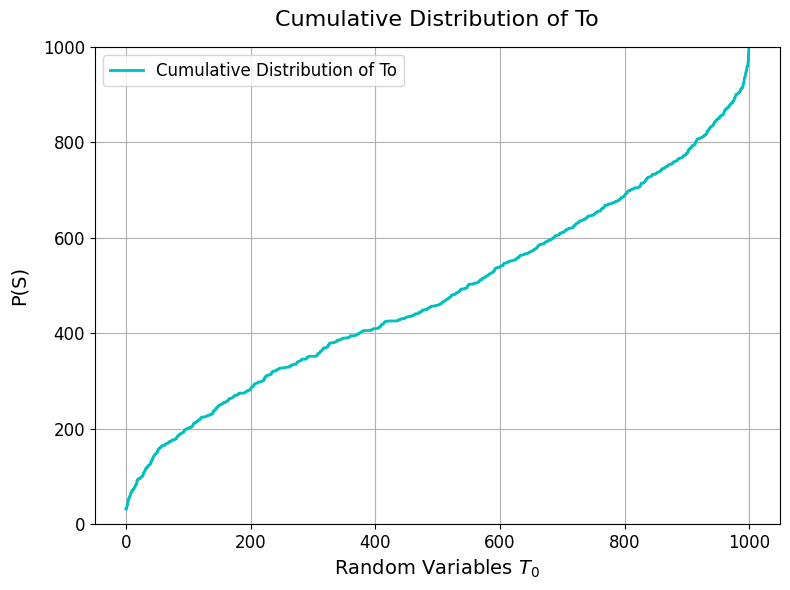

In [ ]:
from sys import hash_info
# Create histogram
counts, bins = np.histogram(zero, bins=1000)
print(zero)
# Print histogram data as a list
histogram_list = list(zip(bins[:-1], counts))
print(histogram_list)
print(histogram_list[1][1])
Cumulative = []
Sum=0
for i in range (len(histogram_list)):
  Sum = Sum + histogram_list[i][1]
  Cumulative.append(Sum)

# Adjust Tzeros to match the length of Cumulative (based on the number of bins in the histogram)
Tzeros = np.arange(len(Cumulative))

# Plotting with improvements
plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.plot(Tzeros, Cumulative, label='Cumulative Distribution of To', color='c', linewidth=2)

plt.xlabel('Random Variables $T_0$', fontsize=14)
plt.ylabel('P(S)', fontsize=14, labelpad=10)
plt.title('Cumulative Distribution of To', fontsize=16, pad=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, T)

plt.grid(True)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

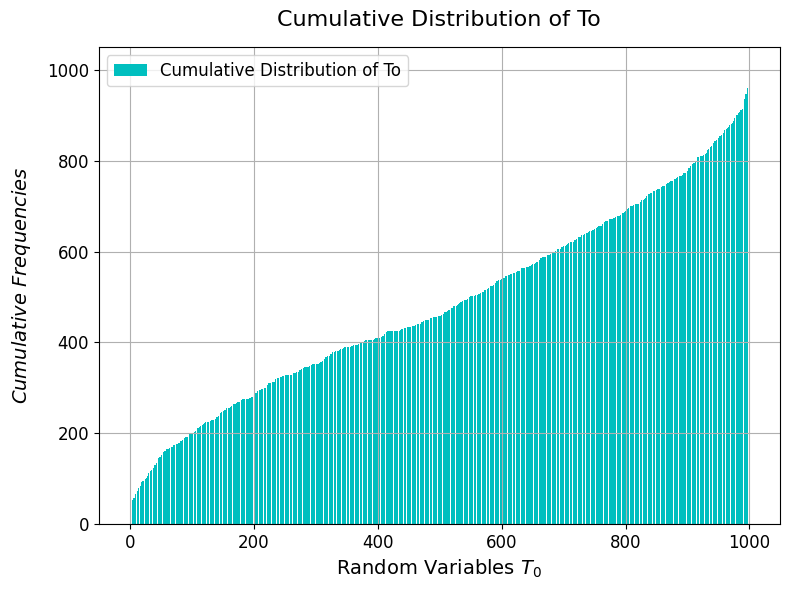

In [ ]:
plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.bar(Tzeros, Cumulative, color='c', label='Cumulative Distribution of To')

# Professional labels with the updated y-axis
plt.xlabel('Random Variables $T_0$', fontsize=14)
plt.ylabel(r'$Cumulative$ $Frequencies$', fontsize=14, labelpad=10)
plt.title('Cumulative Distribution of To', fontsize=16, pad=15)

# Adjusting axis and tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Theoretical Result**

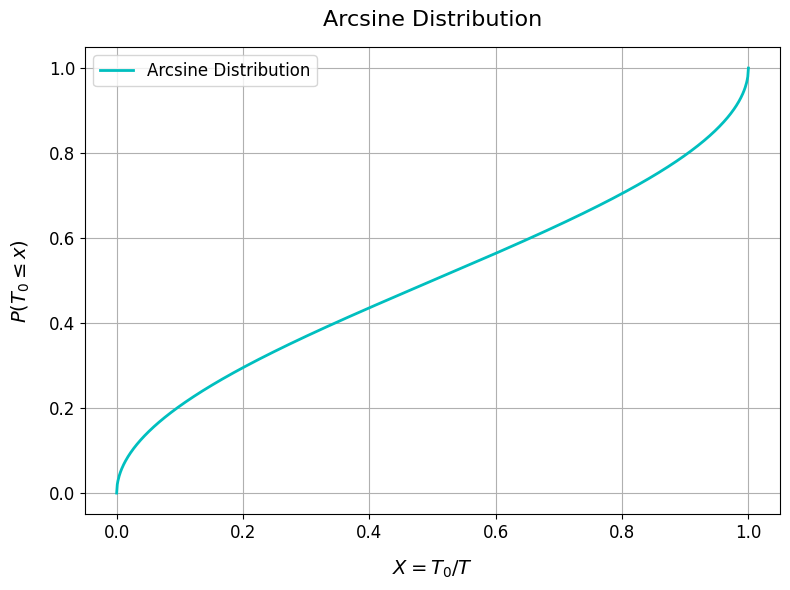

In [ ]:
Tzeros = np.linspace(0, 1, T)  # Ensure values between 0 and 1
def arc_sine(x):
  return (2/np.pi)*np.arcsin(np.sqrt(x))

Cumulative_Dist = arc_sine(Tzeros)

# Plotting the result with improvements
plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.plot(Tzeros, Cumulative_Dist, label='Arcsine Distribution', color='c', linewidth=2)

# Professional labels
plt.xlabel('$X = T_{0}/T$', fontsize=14, labelpad=12)  # Making labels larger than axis
plt.ylabel(r'$P(T_{0} \leq x)$', fontsize=14, labelpad=12)
plt.title('Arcsine Distribution', fontsize=16, pad=15)

# Adjusting axis and tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

***JUST CONSIDER Tmax for positives S(k). Question 3***

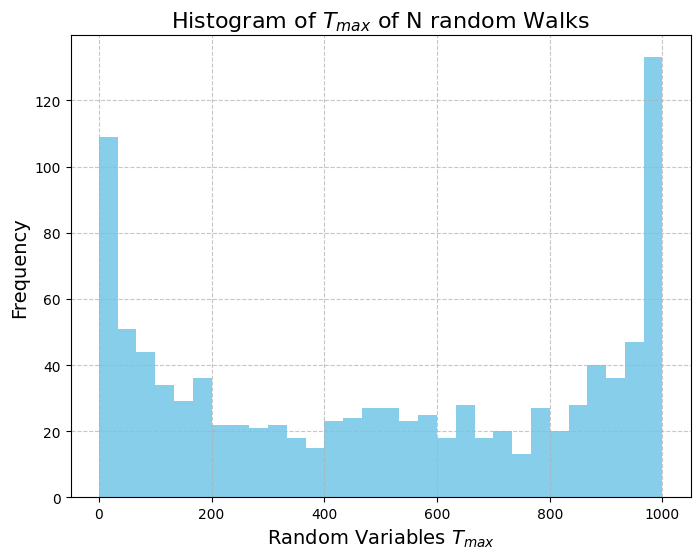

In [ ]:
def random_walk(P, T):
    St = np.zeros(T+1)  # T+1 para incluir s0
    for t in range(1, T+1):  # Empezamos en 1 para s0 = 0
        p = np.random.rand()  # Generamos un número aleatorio
        if P >= p:
            St[t] = St[t-1] + 1
        else:
            St[t] = St[t-1] - 1
    return St

# Parámetros
P = 0.5
T = 1000
N = 1000

# N caminatas, cada una con T+1 valores
S = np.zeros((N, T+1))
S_sum = np.zeros(N)

for i in range(N):
      S[i] = random_walk(P, T)
T_maxes = []
for s in S:
  maximun = np.max(s)
  T_maxes.append([i for i,x in enumerate(s) if x == maximun][-1]) #this is to find a position in a list.
plt.figure(figsize=(8, 6))
plt.hist(T_maxes, bins=30, color='skyblue')
plt.xlabel('Random Variables $T_{max}$', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of $T_{max}$ of N random Walks ', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

[444, 962, 397, 673, 3, 987, 193, 939, 885, 5, 117, 265, 955, 156, 157, 818, 983, 579, 873, 832, 193, 638, 771, 165, 85, 342, 42, 41, 302, 954, 258, 6, 7, 640, 829, 334, 781, 1000, 363, 980, 998, 1000, 46, 997, 745, 528, 983, 982, 12, 102, 940, 920, 921, 122, 6, 942, 326, 421, 869, 738, 284, 999, 998, 280, 278, 968, 482, 0, 995, 975, 66, 454, 16, 796, 35, 52, 506, 172, 858, 836, 876, 851, 987, 643, 594, 578, 685, 299, 58, 60, 995, 358, 31, 701, 746, 193, 616, 616, 499, 593, 871, 931, 781, 913, 924, 869, 562, 494, 24, 901, 847, 978, 995, 624, 167, 472, 981, 394, 110, 617, 907, 1000, 73, 896, 111, 397, 1000, 995, 55, 848, 643, 176, 210, 2, 743, 823, 204, 24, 970, 922, 145, 26, 635, 414, 6, 983, 513, 3, 33, 129, 114, 234, 281, 562, 588, 133, 540, 396, 0, 724, 665, 763, 167, 997, 486, 64, 536, 389, 957, 423, 931, 12, 422, 173, 840, 325, 157, 38, 217, 314, 715, 556, 389, 904, 0, 375, 359, 81, 782, 83, 96, 147, 1000, 994, 10, 803, 616, 921, 67, 899, 779, 102, 717, 507, 91, 164, 287, 765, 321

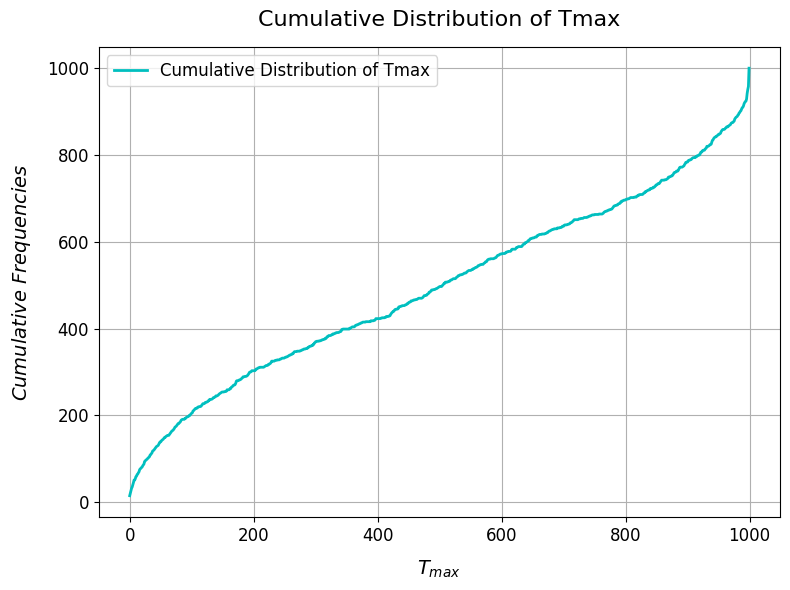

In [ ]:
from sys import hash_info
# Create histogram
counts, bins = np.histogram(T_maxes, bins=1000)
print(T_maxes)
# Print histogram data as a list
histogram_list = list(zip(bins[:-1], counts))
print(histogram_list)
print(histogram_list[1][1])
Cumulative = []
Sum=0
for i in range (len(histogram_list)):
  Sum = Sum + histogram_list[i][1]
  Cumulative.append(Sum)
#print(Cumulative)
Tzeros = np.arange(T)

# Plotting the result with improvements
plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.plot(Tzeros, Cumulative, label='Cumulative Distribution of Tmax', color='c', linewidth=2)

# Professional labels
plt.xlabel('$T_{max}$', fontsize=14, labelpad=10)  # Making labels larger than axis
plt.ylabel(r'$Cumulative$ $Frequencies$', fontsize=14, labelpad=10)
plt.title('Cumulative Distribution of Tmax', fontsize=16, pad=15)

# Adjusting axis and tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

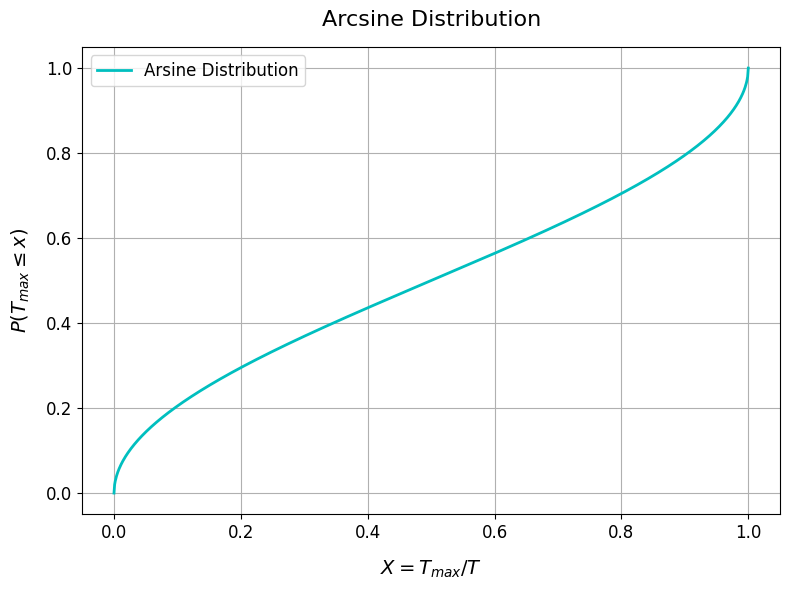

In [ ]:
Tzeros = np.linspace(0, 1, T)  # Ensure values between 0 and 1
def arc_sine(x):
  return (2/np.pi)*np.arcsin(np.sqrt(x))

Cumulative_Dist = arc_sine(Tzeros)

# Plotting the result with improvements
plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.plot(Tzeros, Cumulative_Dist, label='Arsine Distribution', color='c', linewidth=2)

# Professional labels
plt.xlabel('$X = T_{max}/T$', fontsize=14, labelpad=12)  # Making labels larger than axis
plt.ylabel(r'$P(T_{max} \leq x)$', fontsize=14, labelpad=10)
plt.title('Arcsine Distribution', fontsize=16, pad=15)

# Adjusting axis and tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

 **Collective Random Walkers**

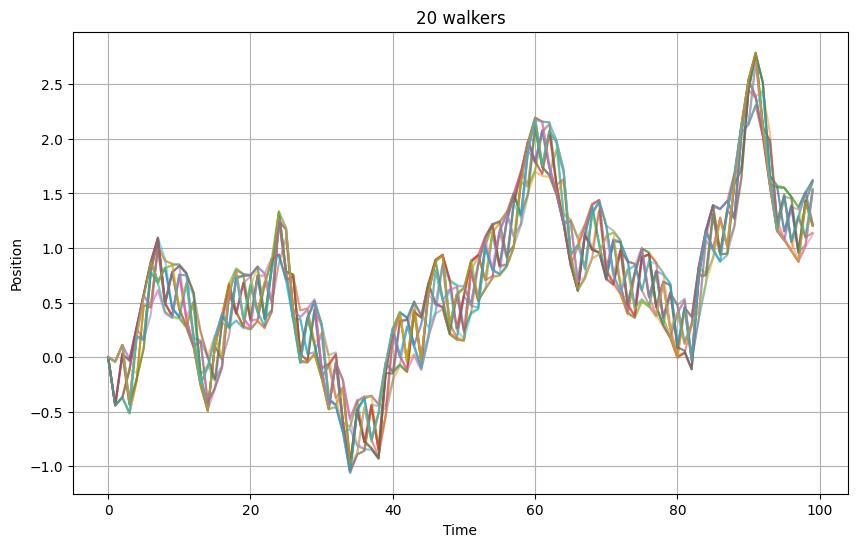

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def random_steps(p, N):
    steps = np.random.choice([1, -1], size=N, p=[p, 1-p])
    return steps

def coupling(s_t, epsilon):
    global_influence = np.mean(s_t)
    s_t_plus_1 = (1 - epsilon) * s_t + epsilon * global_influence
    return s_t_plus_1

# Parámetros
N = 20
T = 100
p = 0.5
epsilon =  0.8 # Factor de acoplamiento

S_walkers = np.zeros((N, T))

for t in range(1, T):
    delta_s = random_steps(p, N)
    s_t = S_walkers[:, t-1] + delta_s
    s_t_coupled = coupling(s_t, epsilon)
    S_walkers[:, t] = s_t_coupled
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(S_walkers[i], alpha=0.5)

plt.title(f'{N} walkers')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.show()


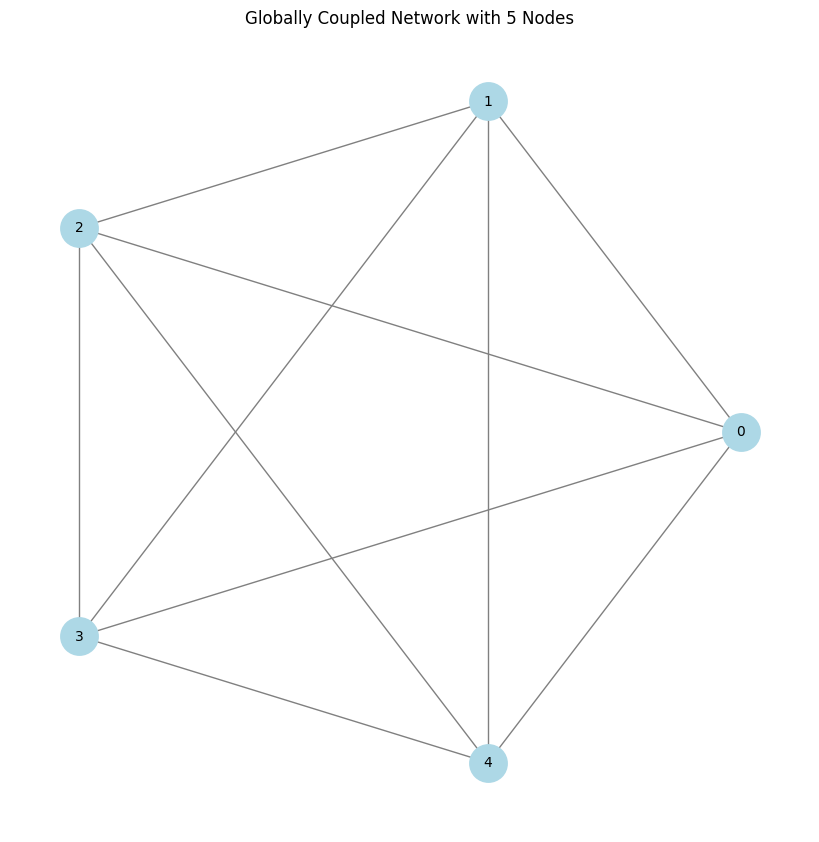

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

N = 5  # Number of nodes

G = nx.complete_graph(N)

plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)  # Position nodes in a circular layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10, edge_color='gray', linewidths=1.5)

plt.title(f'Globally Coupled Network with {N} Nodes')
plt.show()

